# Examen Final - Analyse et Visualisation des Données

## Problème 2 : Étude de cas pratique
Dataset : **Heart Failure Prediction**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SelectKBest, f_classif
import os


- Chargement et exploration

In [2]:
# Charger le dataset
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Infos générales
print(df.info())
print(df.describe())

# Distribution de la cible
print("Proportion des classes: ")
print(df['HeartDisease'].value_counts(normalize=True))

# Variables numériques et catégorielles
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print("Variables numériques:", num_cols)
print("Variables catégorielles:", cat_cols)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

- Prétraitement

In [14]:
from scipy import stats
# Calculer le z-score pour chaque colonne numérique
z_scores = np.abs(stats.zscore(df[num_cols]))

# Transformer en DataFrame pour lisibilité
z_scores_df = pd.DataFrame(z_scores, columns=num_cols)

# Définir un seuil
threshold = 3

# Détecter les outliers
outliers = (z_scores_df > threshold)
print("Nombre d'outliers par variable :")
print(outliers.sum())
# les lignes qui contiennent au moins 1 outlier
outlier_rows = df[(outliers).any(axis=1)]
print("Nombre de lignes avec au moins 1 outlier :", outlier_rows.shape[0])
outlier_rows

Nombre d'outliers par variable :
Age             0
RestingBP       8
Cholesterol     3
FastingBS       0
MaxHR           1
Oldpeak         7
HeartDisease    0
dtype: int64
Nombre de lignes avec au moins 1 outlier : 19


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,1,0,118,529,0,1,130,0,0.0,1,1
109,39,1,1,190,241,0,1,106,0,0.0,2,0
149,54,1,0,130,603,1,1,125,1,1.0,1,1
166,50,1,0,140,231,0,2,140,1,5.0,1,1
241,54,1,0,200,198,0,1,142,1,2.0,1,1
324,46,1,0,100,0,1,2,133,0,-2.6,1,1
365,64,0,0,200,0,0,1,140,1,1.0,1,1
390,51,1,0,140,0,0,1,60,0,0.0,1,1
399,61,1,2,200,0,1,2,70,0,0.0,1,1
449,55,1,2,0,0,0,1,155,0,1.5,1,1


In [5]:
# Encodage des variables catégorielles
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])



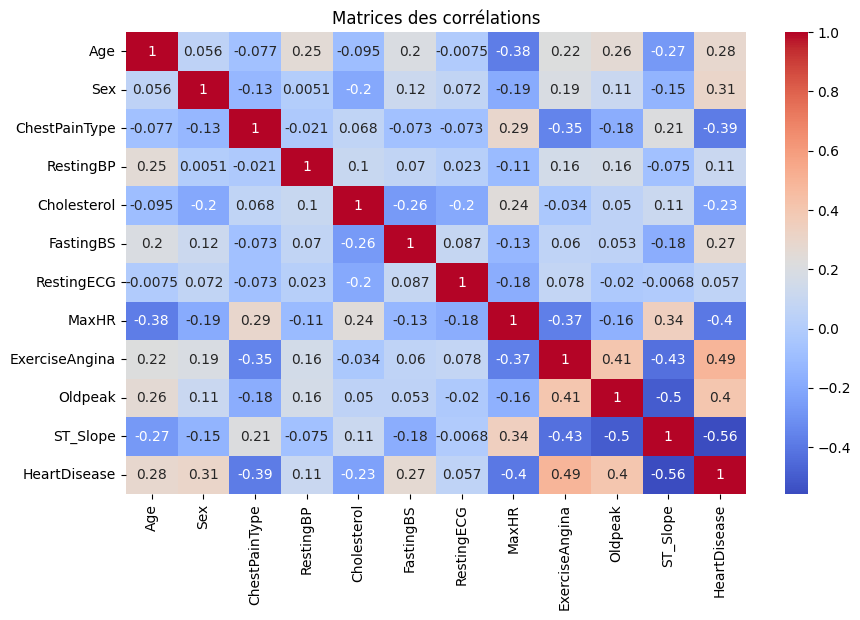

In [15]:
# matrice de corrélations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matrices des corrélations')
plt.show()

In [16]:
# Séparation X / y
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

- Classification sans réduction de dimension

In [17]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(model.__class__.__name__)
    print("Accuracy:", acc)
    print("F1-score:", f1)
    print("Matrices de confusion:\n", cm)
    print("-"*40)
    return acc, f1, cm

In [18]:
results = {}

models = {
    'SVM': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

for name, model in models.items():
    acc, f1, cm = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[(name, 'baseline')] = (acc, f1, cm)

SVC
Accuracy: 0.8913043478260869
F1-score: 0.9065420560747663
Matrices de confusion:
 [[67 15]
 [ 5 97]]
----------------------------------------
KNeighborsClassifier
Accuracy: 0.8913043478260869
F1-score: 0.9029126213592233
Matrices de confusion:
 [[71 11]
 [ 9 93]]
----------------------------------------
DecisionTreeClassifier
Accuracy: 0.7880434782608695
F1-score: 0.8078817733990148
Matrices de confusion:
 [[63 19]
 [20 82]]
----------------------------------------
AdaBoostClassifier
Accuracy: 0.8858695652173914
F1-score: 0.896551724137931
Matrices de confusion:
 [[72 10]
 [11 91]]
----------------------------------------


- Réduction de dimension avec LDA (1 dimension, binaire)

In [19]:
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

for name, model in models.items():
    acc, f1, cm = evaluate_model(model, X_train_lda, X_test_lda, y_train, y_test)
    results[(name, 'LDA')] = (acc, f1, cm)

SVC
Accuracy: 0.8586956521739131
F1-score: 0.8796296296296297
Matrices de confusion:
 [[63 19]
 [ 7 95]]
----------------------------------------
KNeighborsClassifier
Accuracy: 0.7989130434782609
F1-score: 0.821256038647343
Matrices de confusion:
 [[62 20]
 [17 85]]
----------------------------------------
DecisionTreeClassifier
Accuracy: 0.7771739130434783
F1-score: 0.8019323671497585
Matrices de confusion:
 [[60 22]
 [19 83]]
----------------------------------------
AdaBoostClassifier
Accuracy: 0.8532608695652174
F1-score: 0.8755760368663594
Matrices de confusion:
 [[62 20]
 [ 7 95]]
----------------------------------------


- Réduction de dimension avec SelectKBest (k=5)

In [20]:
skb = SelectKBest(score_func=f_classif, k=5)
X_train_kbest = skb.fit_transform(X_train, y_train)
X_test_kbest = skb.transform(X_test)

for name, model in models.items():
    acc, f1, cm = evaluate_model(model, X_train_kbest, X_test_kbest, y_train, y_test)
    results[(name, 'SelectKBest')] = (acc, f1, cm)

SVC
Accuracy: 0.8206521739130435
F1-score: 0.8436018957345972
Matrices de confusion:
 [[62 20]
 [13 89]]
----------------------------------------
KNeighborsClassifier
Accuracy: 0.7989130434782609
F1-score: 0.8195121951219512
Matrices de confusion:
 [[63 19]
 [18 84]]
----------------------------------------
DecisionTreeClassifier
Accuracy: 0.7336956521739131
F1-score: 0.7461139896373057
Matrices de confusion:
 [[63 19]
 [30 72]]
----------------------------------------
AdaBoostClassifier
Accuracy: 0.8260869565217391
F1-score: 0.8350515463917526
Matrices de confusion:
 [[71 11]
 [21 81]]
----------------------------------------


In [11]:
summary = []
for (name, setting), (acc, f1, cm) in results.items():
    summary.append([name, setting, acc, f1])
summary_df = pd.DataFrame(summary, columns=['Model', 'Setting', 'Accuracy', 'F1-score'])
print(summary_df)

# Sauvegarde CSV
summary_df.to_csv('results_summary.csv', index=False)
summary_df

           Model      Setting  Accuracy  F1-score
0            SVM     baseline  0.891304  0.906542
1            KNN     baseline  0.891304  0.902913
2   DecisionTree     baseline  0.788043  0.807882
3       AdaBoost     baseline  0.885870  0.896552
4            SVM          LDA  0.858696  0.879630
5            KNN          LDA  0.798913  0.821256
6   DecisionTree          LDA  0.777174  0.801932
7       AdaBoost          LDA  0.853261  0.875576
8            SVM  SelectKBest  0.820652  0.843602
9            KNN  SelectKBest  0.798913  0.819512
10  DecisionTree  SelectKBest  0.733696  0.746114
11      AdaBoost  SelectKBest  0.826087  0.835052


,Model,Setting,Accuracy,F1-score
0,SVM,baseline,0.891304,0.906542
1,KNN,baseline,0.891304,0.902913
2,DecisionTree,baseline,0.788043,0.807882
3,AdaBoost,baseline,0.885870,0.896552
4,SVM,LDA,0.858696,0.879630
5,KNN,LDA,0.798913,0.821256
6,DecisionTree,LDA,0.777174,0.801932
7,AdaBoost,LDA,0.853261,0.875576
8,SVM,SelectKBest,0.820652,0.843602
9,KNN,SelectKBest,0.798913,0.819512


- Analyse comparative

#Quel modèle s’adapte mieux aux données réduites ?

- SVM (RBF) reste le meilleur après réduction (LDA ou SelectKBest), bien qu’il perde un peu de performance par rapport au full features.

#Le SelectKBest a-t-il amélioré ou dégradé les performances ? Pourquoi ?

- Dégradation par rapport au baseline : F1 passe de 0.906 (sans réduction) à 0.844 (k=5).

- Raisons :

  - Perte d’information : avec seulement 5 variables, on élimine des signaux utiles et des interactions exploitées par SVM/KNN.

  - Méthode univariée : f_classif évalue chaque feature isolément, sans tenir compte des combinaisons non linéaires.

  - LDA (supervisée) conserve mieux la séparation globale, mais la projection en 1D reste trop restrictive pour un problème où la frontière est probablement non linéaire.

# Conclusion :

- Meilleur setup global sur ce dataset : SVM (RBF) sans réduction.

- LDA (1D) > SelectKBest (k=5), mais toutes deux sont moins performantes que l’utilisation de toutes les variables.